In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import LinearRegression
import warnings
import matplotlib.dates as mdates

warnings.filterwarnings('ignore')


In [2]:
nvidia=pd.read_csv('Data/NVIDIA (1999 -11.07.2023).csv') 
asus=pd.read_csv('Data/ASUS (2000 - 11.07.2023).csv')
intel=pd.read_csv('Data/INTEL (1980 - 11.07.2023).csv')
msi= pd.read_csv('Data/Motorola Solutions (MSI) (1962 -11.07.2023).csv') 
amd=pd.read_csv('Data/AMD (1980 -11.07.2023).csv') 



In [3]:
#Head data of all GPU companies
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


In [4]:
asus.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-05,438.747223,446.535675,436.151154,438.747223,89.092613,6.106176e+09
1,2000-01-06,440.045380,447.833862,436.151154,437.449310,88.829048,6.545984e+09
2,2000-01-07,432.256927,433.555084,425.766632,428.362701,86.983925,4.764317e+09
3,2000-01-10,434.853271,454.324158,434.853271,450.429901,91.464920,1.199988e+10
4,2000-01-11,463.410767,463.410767,442.641449,443.939606,90.146988,1.423350e+10


In [5]:
intel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.183718,17068800
1,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.188162,18508800
2,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.187421,11174400
3,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.180754,12172800
4,1980-03-24,0.316406,0.316406,0.311198,0.311198,0.177050,8966400


In [6]:
msi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-03,0.0,1.444702,1.427952,1.436327,0.630355,77611
1,1962-01-04,0.0,1.438421,1.411202,1.423765,0.624842,59701
2,1962-01-05,0.0,1.432140,1.394452,1.415390,0.621167,107462
3,1962-01-08,0.0,1.432140,1.390264,1.390264,0.610140,89551
4,1962-01-09,0.0,1.402827,1.356764,1.356764,0.595438,83581


In [7]:
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415743,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383487,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382293,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381098,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363177,24403200


In [8]:
#Checking for Missing Values
amd.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
asus.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [10]:
intel.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
msi.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
nvidia.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
#Manipulating Data for Asus Company data
asus=asus.dropna()

In [14]:
# Changing dates to timestamps
datal=[amd,asus,intel,msi,nvidia]
for data in datal:
    data['Date']=pd.to_datetime(data['Date'])

In [15]:
#Resampling the Datsets
datal=[amd,asus,intel,msi,nvidia]
names=[0,1,2,3,4]
index=0
for data in datal: 
    dates= data['Date'] 
    data['Company'] = np.repeat (names[index], len(data)) 
    data['Year'] =dates.dt.year
    data[ 'Month'] = dates.dt.month 
    data['Day']= dates.dt.day 
    index+=1
    

In [16]:
# Merging and splitting data into test and train variables
data_list=[amd, asus, intel,msi, nvidia]
test_data = []
train_data = [] 
for data in data_list:
    train = data[ : int(0.8*len (data))] 
    test = data[int(0.8*len (data)) : ] 
    train_data.append(train) 
    test_data.append(test) 
    print(test.shape, train.shape)


(2184, 11) (8735, 11)
(1150, 11) (4596, 11)
(2184, 11) (8735, 11)
(3097, 11) (12387, 11)
(1231, 11) (4923, 11)


In [17]:
train_data=pd.concat(train_data) 
test_data =pd.concat(test_data)
print(train_data.shape)
print(test_data.shape)

(39376, 11)
(9846, 11)


In [20]:
x_train= train_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Company']] 
x_test =test_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'Company']]
y_train =train_data[ 'Close'] 
y_test= test_data['Close'] 

print(x_train.shape) 
print(x_test.shape)
print(y_train.shape) 
print(y_test.shape)

(39376, 8)
(9846, 8)
(39376,)
(9846,)


In [21]:
#Data Analysis
amd.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,10919,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04,10919.0,10919.000000,10919.000000,10919.000000
mean,2001-11-02 08:46:51.686051840,16.842664,17.510743,16.761635,17.138932,17.138932,1.846495e+07,0.0,2001.338126,6.526605,15.738438
min,1980-03-18 00:00:00,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,0.0,1980.000000,1.000000,1.000000
25%,1991-01-03 12:00:00,4.960000,5.437500,5.125000,5.300000,5.300000,1.226100e+06,0.0,1991.000000,4.000000,8.000000
50%,2001-10-29 00:00:00,9.875000,10.062500,9.630000,9.875000,9.875000,6.833200e+06,0.0,2001.000000,7.000000,16.000000
75%,2012-08-29 12:00:00,16.125000,16.403125,15.805000,16.120001,16.120001,2.284015e+07,0.0,2012.000000,10.000000,23.000000
max,2023-07-10 00:00:00,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08,0.0,2023.000000,12.000000,31.000000
std,NaN,23.317716,23.609612,22.615398,23.121619,23.121619,2.815631e+07,0.0,12.509742,3.422874,8.748574


In [22]:
asus.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,5746,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000,5.746000e+03,5746.0,5746.000000,5746.000000,5746.000000
mean,2011-08-26 14:55:25.583014144,290.489678,293.667370,287.055492,290.235818,128.518523,1.016665e+09,1.0,2011.146189,6.584929,15.835712
min,2000-01-05 00:00:00,127.106941,130.196335,127.106941,130.196335,28.863441,0.000000e+00,1.0,2000.000000,1.000000,1.000000
25%,2005-07-07 06:00:00,234.528175,237.000000,231.808762,234.500000,76.379619,1.696000e+06,1.0,2005.000000,4.000000,8.000000
50%,2011-10-05 12:00:00,278.000000,280.000000,275.409851,278.000000,120.188485,3.186387e+06,1.0,2011.000000,7.000000,16.000000
75%,2017-08-10 18:00:00,330.087112,334.000000,326.500000,330.000000,163.233246,8.475086e+08,1.0,2017.000000,10.000000,23.000000
max,2023-07-10 00:00:00,567.667419,575.104126,547.836243,565.188538,314.543518,2.833812e+10,1.0,2023.000000,12.000000,31.000000
std,NaN,75.957579,76.739552,74.935856,75.602517,66.079585,2.177426e+09,0.0,6.866389,3.413409,8.715091


In [23]:
intel.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,10919,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,1.091900e+04,10919.0,10919.000000,10919.000000,10919.000000
mean,2001-11-02 08:46:51.686051840,19.897342,20.169676,19.627548,19.896781,14.668655,5.052754e+07,2.0,2001.338126,6.526605,15.738438
min,1980-03-18 00:00:00,0.218750,0.218750,0.216146,0.216146,0.122972,0.000000e+00,2.0,1980.000000,1.000000,1.000000
25%,1991-01-03 12:00:00,1.343750,1.367188,1.320313,1.343750,0.764502,2.713025e+07,2.0,1991.000000,4.000000,8.000000
50%,2001-10-29 00:00:00,20.350000,20.650000,20.093750,20.370001,12.680091,4.450540e+07,2.0,2001.000000,7.000000,16.000000
75%,2012-08-29 12:00:00,30.115001,30.593750,29.670000,30.066250,19.987983,6.467910e+07,2.0,2012.000000,10.000000,23.000000
max,2023-07-10 00:00:00,75.625000,75.828125,73.625000,74.875000,63.348770,5.677088e+08,2.0,2023.000000,12.000000,31.000000
std,NaN,17.487968,17.729974,17.252020,17.487397,14.781238,3.481933e+07,0.0,12.509742,3.422874,8.748574


In [24]:
msi.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,15484,15484.000000,15484.000000,15484.000000,15484.000000,15484.000000,1.548400e+04,15484.0,15484.000000,15484.000000,15484.000000
mean,1992-10-13 04:26:04.246964608,45.915441,47.352928,46.153413,46.760641,38.499299,1.992720e+06,3.0,1992.285456,6.504133,15.735598
min,1962-01-03 00:00:00,0.000000,0.866821,0.808196,0.845884,0.375586,0.000000e+00,3.0,1962.000000,1.000000,1.000000
25%,1977-06-16 18:00:00,3.806477,5.188366,5.050177,5.119272,2.622875,5.086000e+05,3.0,1977.000000,4.000000,8.000000
50%,1992-10-08 12:00:00,24.007187,24.271002,23.630306,23.988343,16.508859,1.288600e+06,3.0,1992.000000,6.000000,16.000000
75%,2008-02-21 06:00:00,67.536697,68.290459,66.732921,67.405529,52.430208,2.622858e+06,3.0,2008.000000,9.000000,23.000000
max,2023-07-10 00:00:00,298.500000,299.429993,297.140015,297.450012,296.515137,4.717163e+07,3.0,2023.000000,12.000000,31.000000
std,NaN,56.804625,56.774068,55.509647,56.157440,53.186087,2.344350e+06,0.0,17.735967,3.432078,8.743104


In [25]:
nvidia.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,Month,Day
count,6154,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6.154000e+03,6154.0,6154.000000,6154.000000,6154.000000
mean,2011-04-16 13:21:39.837504,34.055888,34.707315,33.394796,34.080465,33.818979,6.120887e+07,4.0,2010.792168,6.497725,15.732044
min,1999-01-25 00:00:00,0.348958,0.355469,0.333333,0.341146,0.313002,1.968000e+06,4.0,1999.000000,1.000000,1.000000
25%,2005-03-08 06:00:00,2.682084,2.768125,2.612500,2.685417,2.463874,3.443320e+07,4.0,2005.000000,4.000000,8.000000
50%,2011-04-14 12:00:00,4.371250,4.443750,4.280000,4.367500,4.024390,5.136085e+07,4.0,2011.000000,6.000000,16.000000
75%,2017-05-25 18:00:00,33.498124,34.356876,32.490626,33.403123,33.137190,7.449690e+07,4.0,2017.000000,9.000000,23.000000
max,2023-07-10 00:00:00,435.010010,439.899994,426.739990,438.079987,438.079987,9.230856e+08,4.0,2023.000000,12.000000,31.000000
std,NaN,67.420090,68.760909,66.069289,67.472837,67.479411,4.385313e+07,0.0,7.064137,3.419204,8.761435


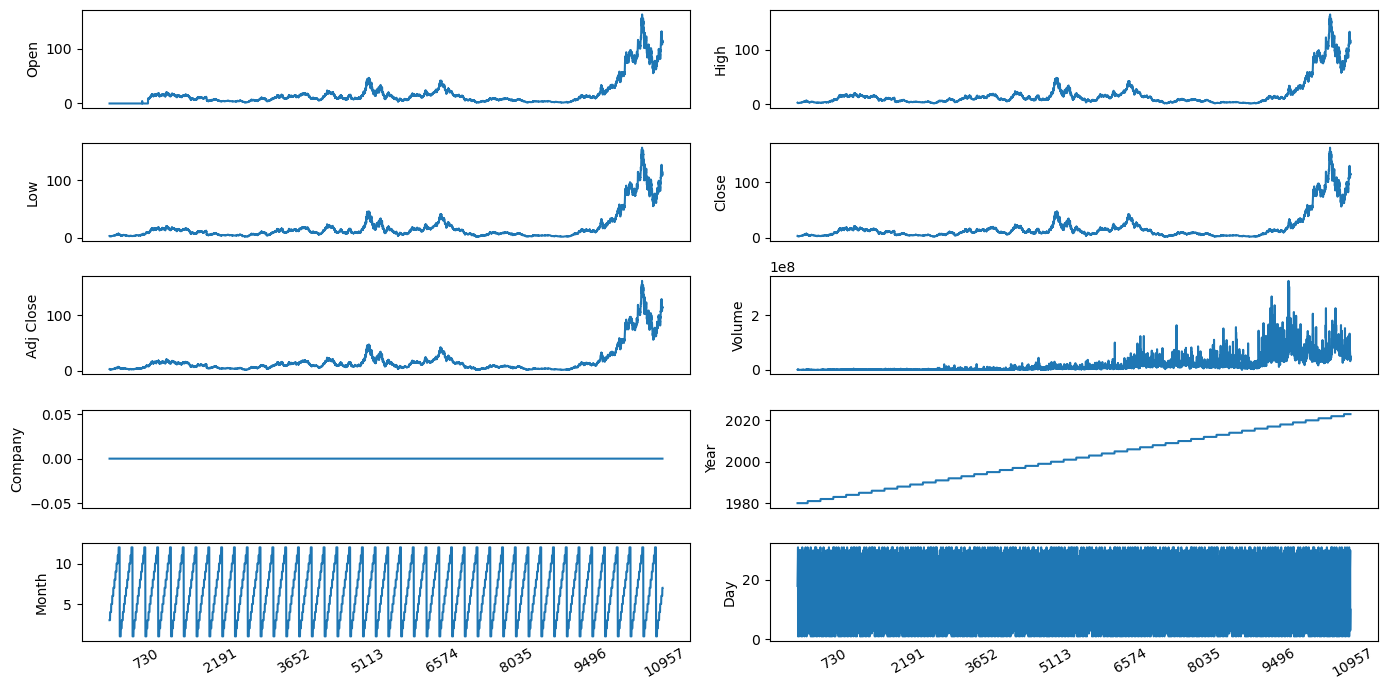

In [28]:
import matplotlib.dates as mdates
#Bivariate Analysis for AMD stock data set
df_plot=amd.drop(columns=['Date'])
ncols=2
nrows=int(round(df_plot.shape[1]/ncols,0))

fig,ax=plt.subplots(nrows=nrows,ncols=ncols,sharex=True,figsize=(14,7))
for i,ax in enumerate(fig.axes):
    sns.lineplot(data=df_plot.iloc[:,i],ax=ax)
    ax.tick_params(axis="x",rotation=30,labelsize=10,length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()


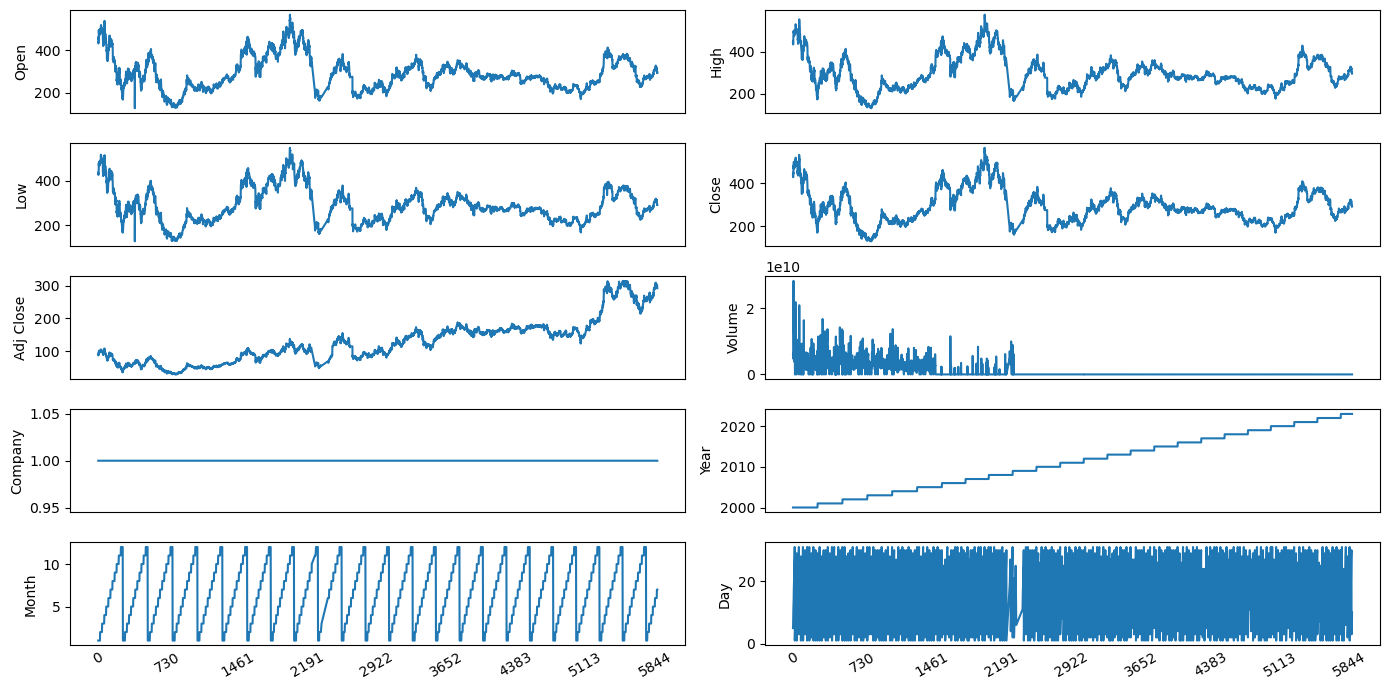

In [29]:
import matplotlib.dates as mdates
#Bivariate Analysis for Asus stock data set
df_plot=asus.drop(columns=['Date'])
ncols=2
nrows=int(round(df_plot.shape[1]/ncols,0))

fig,ax=plt.subplots(nrows=nrows,ncols=ncols,sharex=True,figsize=(14,7))
for i,ax in enumerate(fig.axes):
    sns.lineplot(data=df_plot.iloc[:,i],ax=ax)
    ax.tick_params(axis="x",rotation=30,labelsize=10,length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()


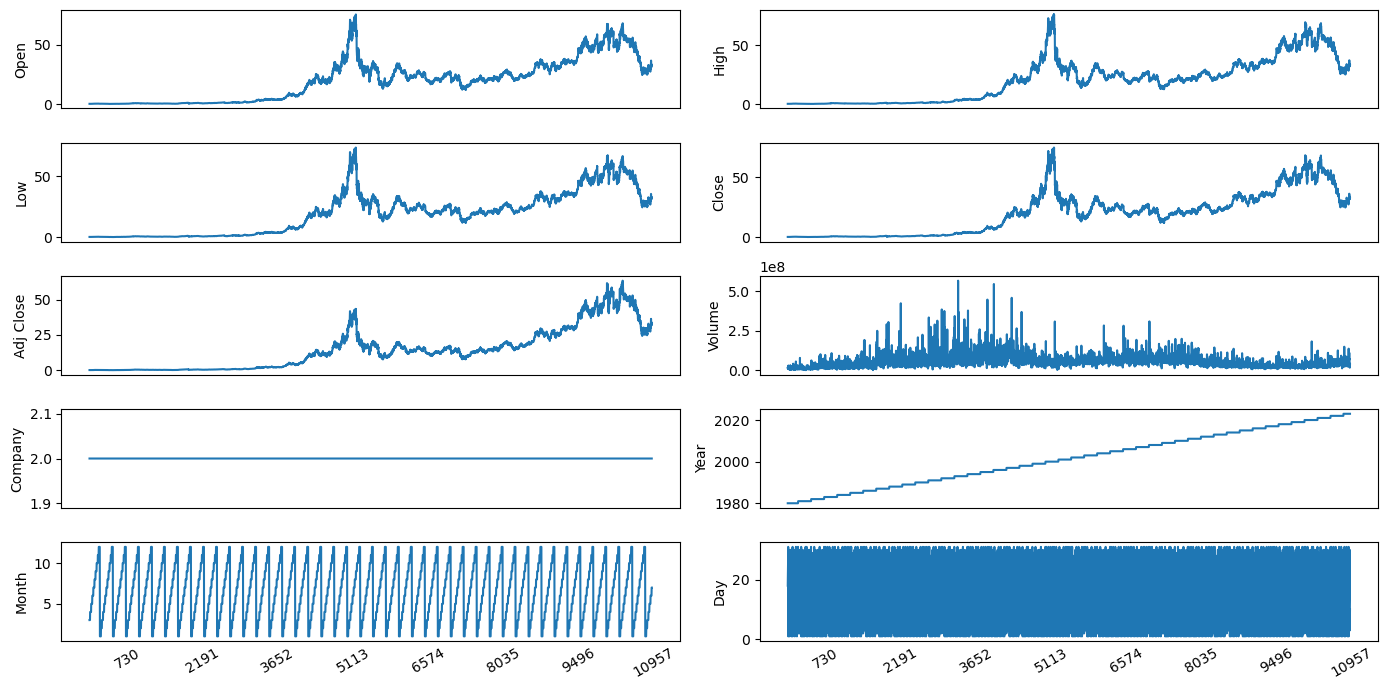

In [30]:
import matplotlib.dates as mdates
#Bivariate Analysis for Intel stock data set
df_plot=intel.drop(columns=['Date'])
ncols=2
nrows=int(round(df_plot.shape[1]/ncols,0))

fig,ax=plt.subplots(nrows=nrows,ncols=ncols,sharex=True,figsize=(14,7))
for i,ax in enumerate(fig.axes):
    sns.lineplot(data=df_plot.iloc[:,i],ax=ax)
    ax.tick_params(axis="x",rotation=30,labelsize=10,length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()


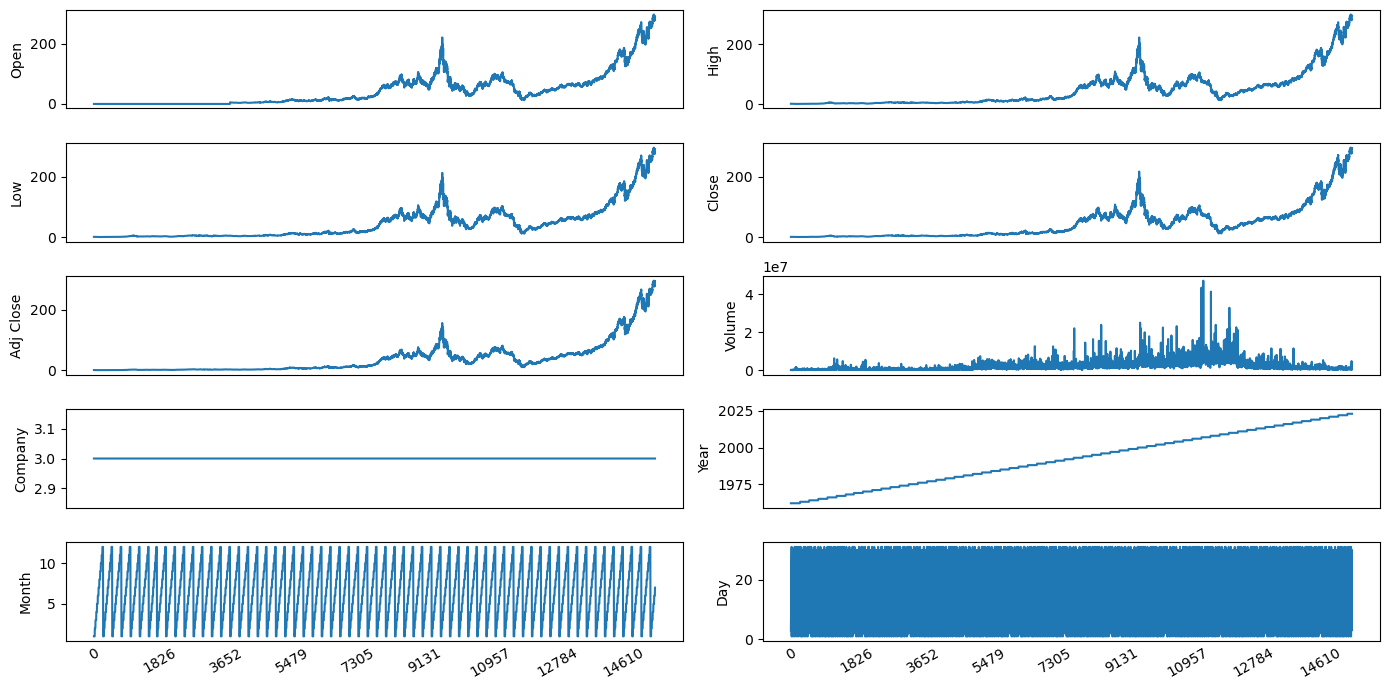

In [31]:
import matplotlib.dates as mdates
#Bivariate Analysis for MSI stock data set
df_plot=msi.drop(columns=['Date'])
ncols=2
nrows=int(round(df_plot.shape[1]/ncols,0))

fig,ax=plt.subplots(nrows=nrows,ncols=ncols,sharex=True,figsize=(14,7))
for i,ax in enumerate(fig.axes):
    sns.lineplot(data=df_plot.iloc[:,i],ax=ax)
    ax.tick_params(axis="x",rotation=30,labelsize=10,length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()


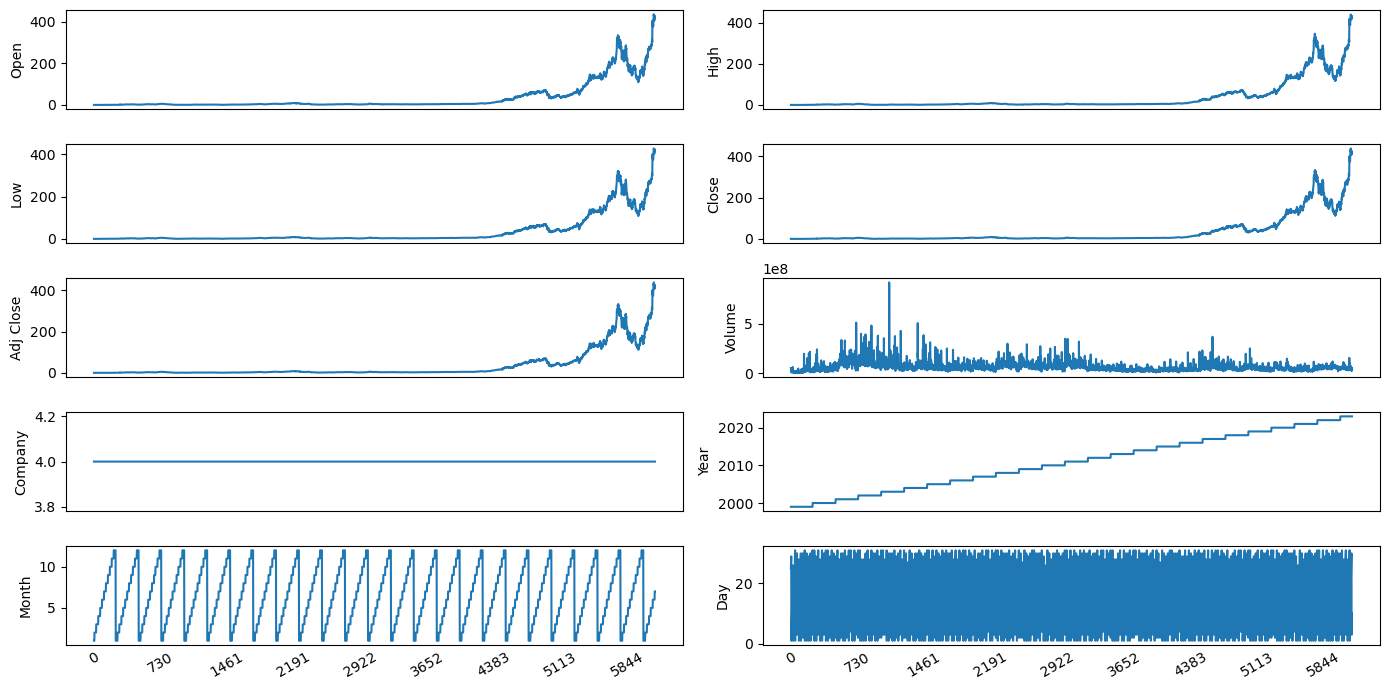

In [32]:
import matplotlib.dates as mdates
#Bivariate Analysis for Nvidia stock data set
df_plot=nvidia.drop(columns=['Date'])
ncols=2
nrows=int(round(df_plot.shape[1]/ncols,0))

fig,ax=plt.subplots(nrows=nrows,ncols=ncols,sharex=True,figsize=(14,7))
for i,ax in enumerate(fig.axes):
    sns.lineplot(data=df_plot.iloc[:,i],ax=ax)
    ax.tick_params(axis="x",rotation=30,labelsize=10,length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()


In [33]:
#Model Building
#Linear Regression Model
lr=LinearRegression()
lr.fit(x_train,y_train)

print('Test Score:',lr.score(x_test,y_test))
print('Train Score',lr.score(x_train,y_train))

y_pred=lr.predict(x_test)
print('R2 Score: ',r2_score(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))

Test Score: 0.9998391287106981
Train Score 0.9998961451078356
R2 Score:  0.9998391287106981
MAE : 0.7044060600746351


In [35]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regression Model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

print('Test Score:',dt.score(x_test,y_test))
print('Train Score',dt.score(x_train,y_train))

y_pred=dt.predict(x_test)
print('R2 Score: ',r2_score(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))

Test Score: 0.999612641841167
Train Score 1.0
R2 Score:  0.999612641841167
MAE : 1.0284138971155798


In [37]:
#Extra Tree Regression
from sklearn.tree import ExtraTreeRegressor
etr=ExtraTreeRegressor()
etr.fit(x_train,y_train)

print('Test Score:',etr.score(x_test,y_test))
print('Train Score',etr.score(x_train,y_train))

y_pred=etr.predict(x_test)
print('R2 Score: ',r2_score(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))

Test Score: 0.9995045278262965
Train Score 1.0
R2 Score:  0.9995045278262965
MAE : 1.1386035499695308


In [40]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

print('Test Score:',rf.score(x_test,y_test))
print('Train Score',rf.score(x_train,y_train))

y_pred=rf.predict(x_test)
print('R2 Score: ',r2_score(y_test,y_pred))
print('MAE :', mean_absolute_error(y_test,y_pred))

Test Score: 0.9998016333792948
Train Score 0.9999713671834489
R2 Score:  0.9998016333792948
MAE : 0.7397681864269761


In [41]:
amd_dates=test_data[test_data[ 'Company']==0]['Date'] 
amd_pred= lr.predict (x_test [x_test['Company']==0]) 
amd_orig = test_data[test_data['Company']==0]["Close"]

asus_dates=test_data[test_data[ 'Company']==1]['Date'] 
asus_pred= lr.predict (x_test [x_test['Company']==1]) 
asus_orig = test_data[test_data['Company']==1]["Close"]

intel_dates=test_data[test_data[ 'Company']==2]['Date'] 
intel_pred= lr.predict (x_test [x_test['Company']==2]) 
intel_orig = test_data[test_data['Company']==2]["Close"]

msi_dates=test_data[test_data[ 'Company']==3]['Date'] 
msi_pred= lr.predict (x_test [x_test['Company']==3]) 
msi_orig = test_data[test_data['Company']==3]["Close"]

nvidia_dates=test_data[test_data[ 'Company']==4]['Date'] 
nvidia_pred= lr.predict (x_test [x_test['Company']==4]) 
nvidia_orig = test_data[test_data['Company']==4]["Close"]


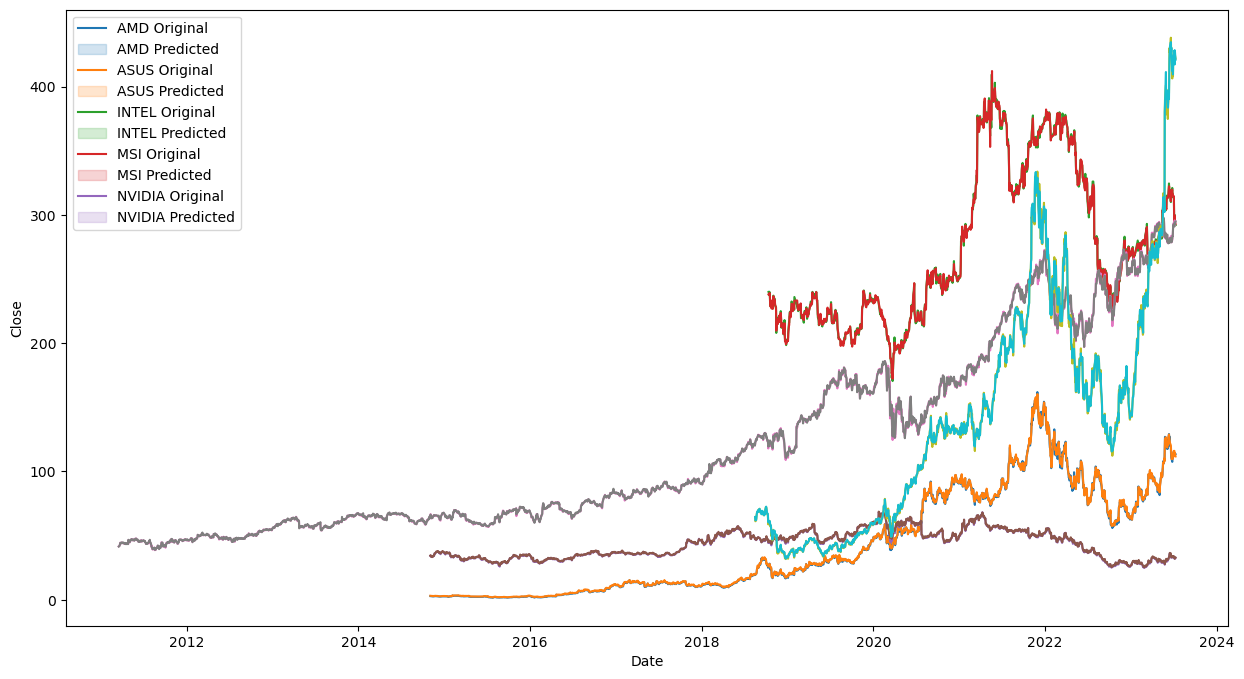

In [45]:
#Plot predictions and actual values

plt.figure(figsize=(15,8))

sns.lineplot(x=amd_dates,y=amd_orig)
sns.lineplot(x=amd_dates,y=amd_pred)

sns.lineplot(x=asus_dates,y=asus_orig)
sns.lineplot(x=asus_dates,y=asus_pred)

sns.lineplot(x=intel_dates,y=intel_orig)
sns.lineplot(x=intel_dates,y=intel_pred)

sns.lineplot(x=msi_dates,y=msi_orig)
sns.lineplot(x=msi_dates,y=msi_pred)

sns.lineplot(x=nvidia_dates,y=nvidia_orig)
sns.lineplot(x=nvidia_dates,y=nvidia_pred)

plt.legend (['AMD Original', 'AMD Predicted', 'ASUS Original', 'ASUS Predicted', 'INTEL Original', 'INTEL Predicted', 
             'MSI Original', 'MSI Predicted', 'NVIDIA Original', 'NVIDIA Predicted']) 
plt.show()

In [46]:
#Saving The Model
import pickle as pkl
pkl.dump(lr,open('lr.pkl','wb'))